### Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 

#set visualization theme 
sns.set()

In [2]:
#Import dataset
data_import = pd.read_csv('Jewelry_Dataset.csv')

data_import.columns = [
    'Order_datetime',
    'Order_ID',
    'Product_ID',
    'SKU_Quantity',
    'Category_ID',
    'Category_alias',
    'Brand_ID',
    'Price_USD',
    'User_ID',
    'Product_gender',
    'Main_color',
    'Main_metal',
    'Main_gem'
]

data_import.head()

,Order_datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category_alias,Brand_ID,Price_USD,User_ID,Product_gender,Main_color,Main_metal,Main_gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


### EDA

In [3]:
# Getting the number of null values per feature
data_import.isnull().sum()

Order_datetime        0
Order_ID              0
Product_ID            0
SKU_Quantity          0
Category_ID        5352
Category_alias     9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Product_gender    48167
Main_color         7660
Main_metal         5462
Main_gem          34058
dtype: int64

In [4]:
# Getting the shape 
data_import.shape

(95910, 13)

In [5]:
# Looking at feature cardinality
data_import.nunique()

Order_datetime    74504
Order_ID          74759
Product_ID         9613
SKU_Quantity          1
Category_ID          25
Category_alias      218
Brand_ID           2537
Price_USD          3166
User_ID           31079
Product_gender        2
Main_color            5
Main_metal            3
Main_gem             30
dtype: int64

In [6]:
# Describing the data
data_import.describe()

,Order_ID,Product_ID,SKU_Quantity,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [7]:
#additional info 

data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category_alias  85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Product_gender  47743 non-null  object 
 10  Main_color      88250 non-null  object 
 11  Main_metal      90448 non-null  object 
 12  Main_gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [8]:
# Checking for duplicates 
num_duplicated = len(data_import.loc[data_import.duplicated()])

print(f'Number of duplicates: ', num_duplicated)

Number of duplicates:  2589


In [9]:
# Looking for features that are constant with a cardinality of 1
invariant_features = data_import.nunique()[data_import.nunique() == 1].index.tolist()

#printing such features after converting the result to a list 
invariant_features

['SKU_Quantity']

#### Visualize the price in dollars to get an idea of the nature of its distribution 

In [10]:
# First look at the skew 

data_import['Price_USD'].skew()

18.95906072625981

In [11]:
#Then a look at the kurtosis 

data_import['Price_USD'].kurtosis()

1054.8979068506155

C:\Users\USER\anaconda3\envs\Python_data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


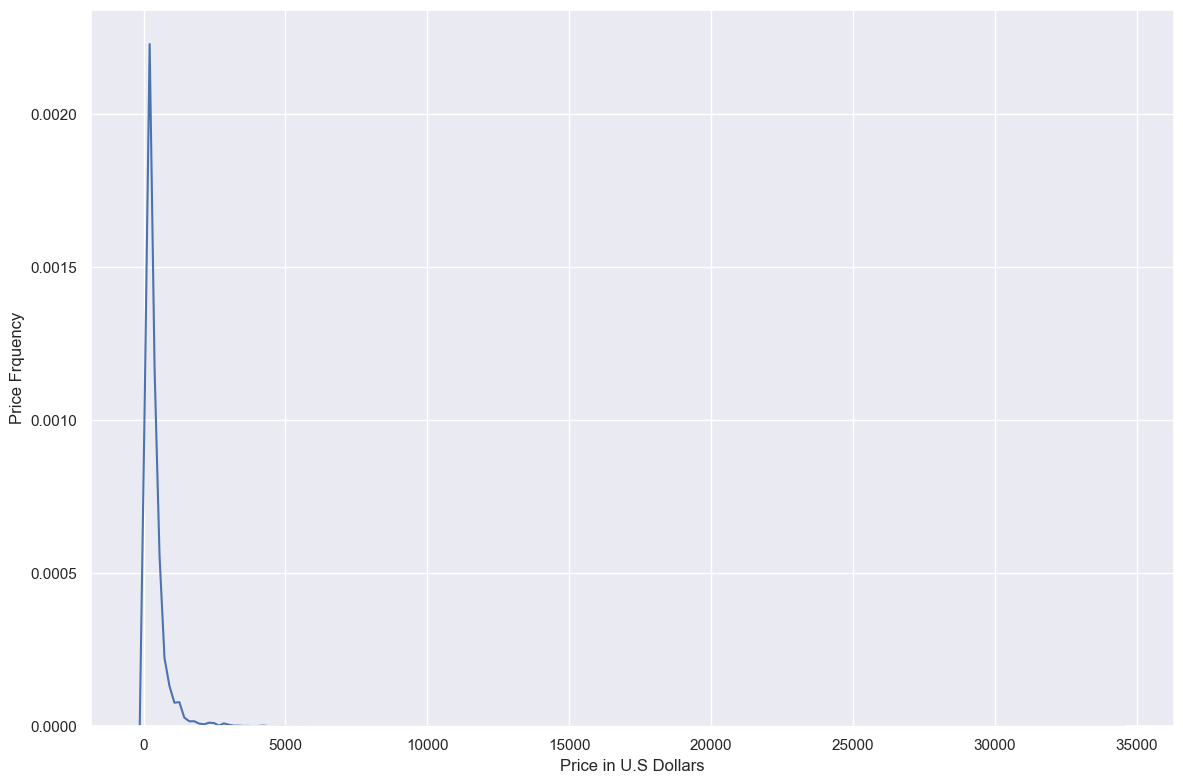

In [12]:
#Creating a KDEplot 

plt.figure(figsize=(12,8))

sns.kdeplot(data=data_import, x='Price_USD')

plt.xlabel('Price in U.S Dollars')
plt.ylabel('Price Frquency')
plt.tight_layout()

plt.show(); plt.close()

#### Analysis based on gender

In [13]:
data_import['Product_gender'].value_counts()

Product_gender
f    47379
m      364
Name: count, dtype: int64

In [14]:
#Normalizing the result to know the actual prcentages 

data_import['Product_gender'].value_counts(normalize = True)

Product_gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

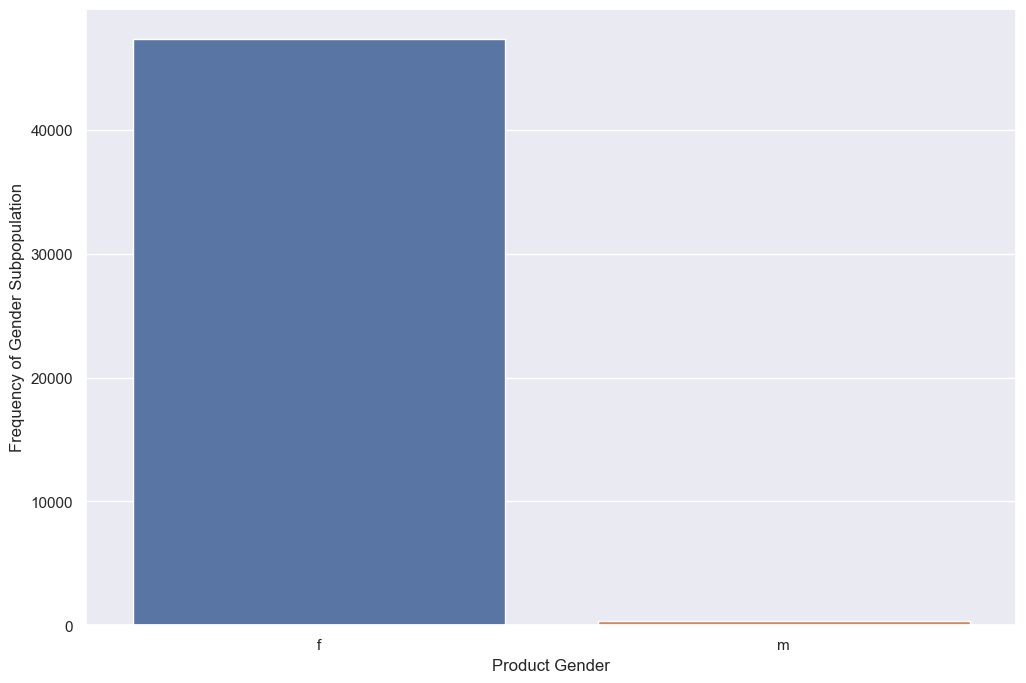

In [16]:
#Visualizing the gender 
plt.figure(figsize= (12,8))

sns.countplot(data = data_import, x='Product_gender')
plt.xlabel('Product Gender')
plt.ylabel('Frequency of Gender Subpopulation')

plt.show(); plt.close()

#### Examining the jewelry category 


In [17]:
data_import['Category_alias'].value_counts()

Category_alias
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64

In [18]:
categories = data_import['Category_alias'].unique().tolist()

categories = [c for c in categories if isinstance(c, str) and 'jewelry' in c]

In [19]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [20]:
#creating a subdata with the actual categories 
real_categories = data_import.loc[data_import['Category_alias'].isin(categories)]

In [21]:
#finding the percentage of missing values 

100 * data_import.isnull().sum()/len(data_import)

Order_datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        5.580231
Category_alias    10.356584
Brand_ID           4.989052
Price_USD          5.580231
User_ID            5.580231
Product_gender    50.221041
Main_color         7.986654
Main_metal         5.694922
Main_gem          35.510374
dtype: float64

In [22]:
#finding the percentage of missing values 

100 * real_categories.isnull().sum()/len(real_categories)

Order_datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category_alias     0.000000
Brand_ID           4.309081
Price_USD          0.000000
User_ID            0.000000
Product_gender    44.842029
Main_color         2.656044
Main_metal         0.110617
Main_gem          24.232519
dtype: float64

#### Jewelry Categories 

In [24]:
subdata = real_categories['Category_alias'].value_counts()

jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()

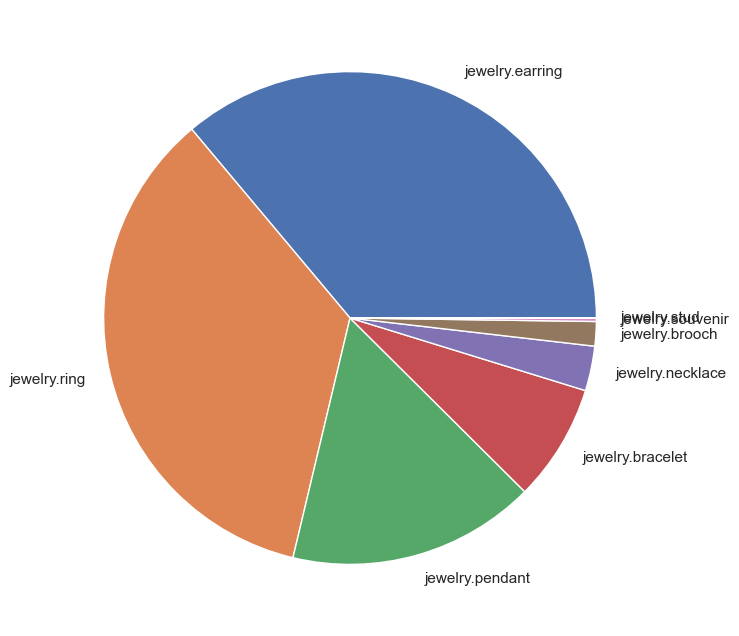

In [25]:
plt.figure(figsize=(10,8))

plt.pie(x= counts, labels= jewelry_categories)

plt.show(); plt.close()

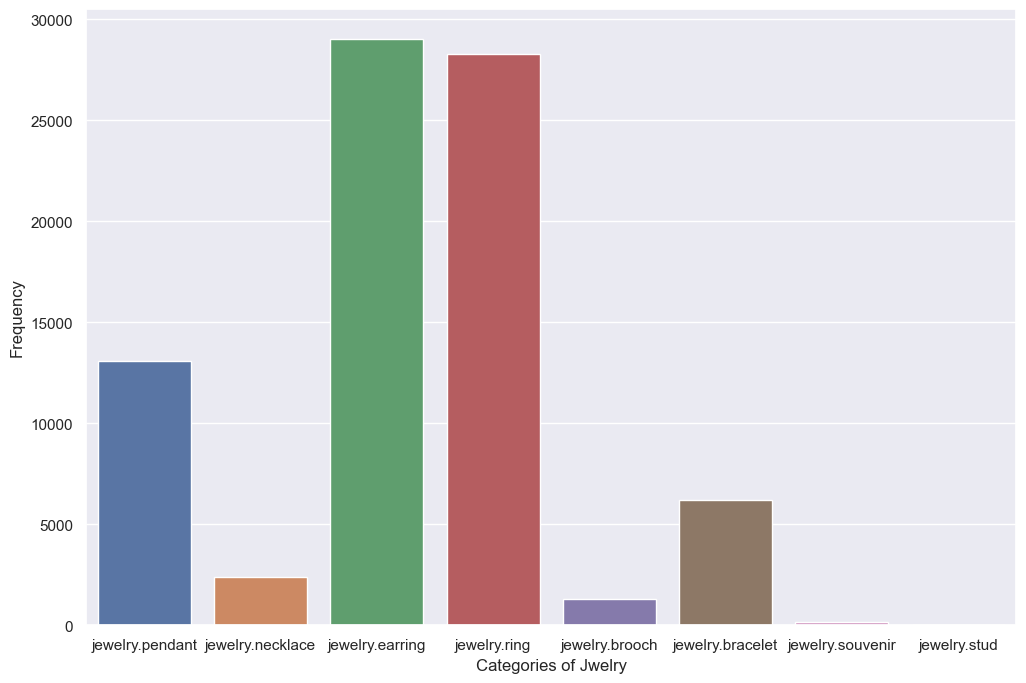

In [26]:
# Category count plot 
plt.figure(figsize =(12,8))

sns.countplot(data=real_categories, x='Category_alias')

plt.xlabel('Categories of Jwelry')
plt.ylabel('Frequency')

plt.show(); plt.close()

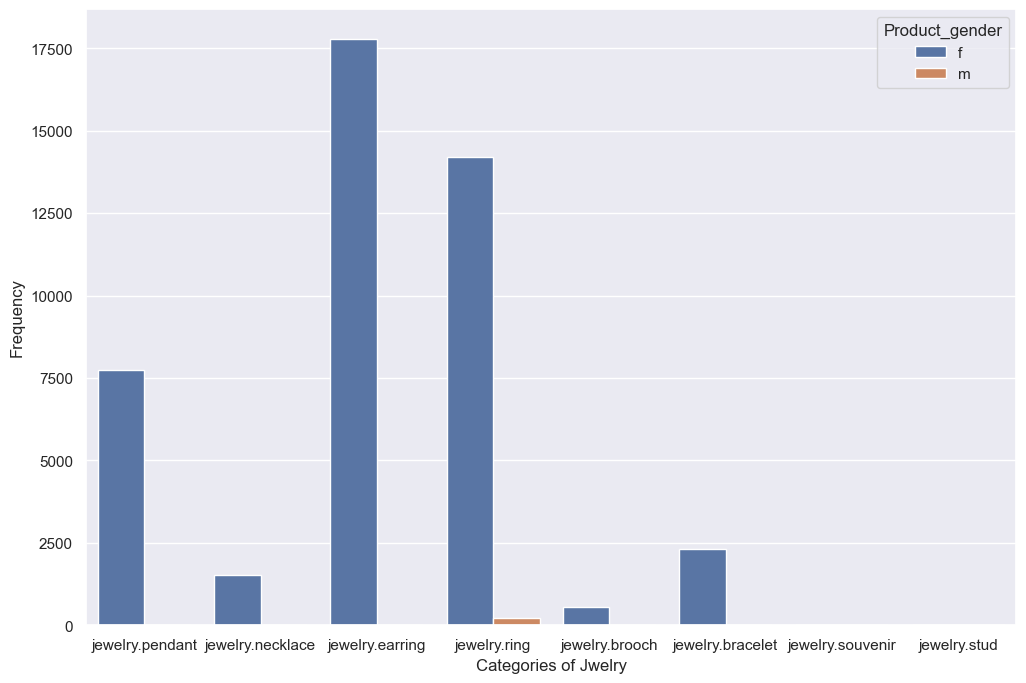

In [27]:
# Category count plot buy brokeen down by gender 
plt.figure(figsize =(12,8))

sns.countplot(data=real_categories, x='Category_alias', hue='Product_gender')

plt.xlabel('Categories of Jwelry')
plt.ylabel('Frequency')

plt.show(); plt.close()

#### Encoding the categorical variables 

In [28]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category_alias  85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Product_gender  47743 non-null  object 
 10  Main_color      88250 non-null  object 
 11  Main_metal      90448 non-null  object 
 12  Main_gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [29]:
encoded, uniques = pd.factorize(real_categories['Category_alias'])
real_categories.loc[:, 'Category_alias'] = encoded

In [30]:
encoded, uniques = pd.factorize(real_categories['Main_color'])
real_categories.loc[:, 'Main_color'] = encoded

In [31]:
encoded, uniques = pd.factorize(real_categories['Main_metal'])
real_categories.loc[:, 'Main_metal'] = encoded

In [32]:
encoded, uniques = pd.factorize(real_categories['Main_gem'])
real_categories.loc[:, 'Main_gem'] = encoded

In [33]:
encoded, uniques = pd.factorize(real_categories['Product_gender'])
real_categories.loc[:, 'Product_gender'] = encoded

In [34]:
real_categories.head()

,Order_datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category_alias,Brand_ID,Price_USD,User_ID,Product_gender,Main_color,Main_metal,Main_gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,2,1.0,102.27,1.515916e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,2,0.0,150.55,1.515916e+18,-1,1,0,1


In [35]:
real_categories['Product_gender'].value_counts()

Product_gender
0     44132
-1    36079
1       247
Name: count, dtype: int64

In [36]:
#Creating a correlation matrix to look at the correlations
columns = ['Order_datetime', 'Order_ID', 'Product_ID', 'User_ID']

correlations = real_categories.drop(labels=columns, axis=1).corr(method = 'spearman')

Spearman's correlation was used instead of pearson because a lot of the variables were categorical in nature and not strictly numerical. 

In [37]:
correlations

,SKU_Quantity,Category_ID,Category_alias,Brand_ID,Price_USD,Product_gender,Main_color,Main_metal,Main_gem
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,-0.886212,0.111328,-0.296495,0.106286,0.003396,0.157834,0.050483
Category_alias,NaN,-0.886212,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,NaN,0.111328,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_USD,NaN,-0.296495,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Product_gender,NaN,0.106286,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_color,NaN,0.003396,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_metal,NaN,0.157834,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_gem,NaN,0.050483,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


C:\Users\USER\anaconda3\envs\Python_data\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


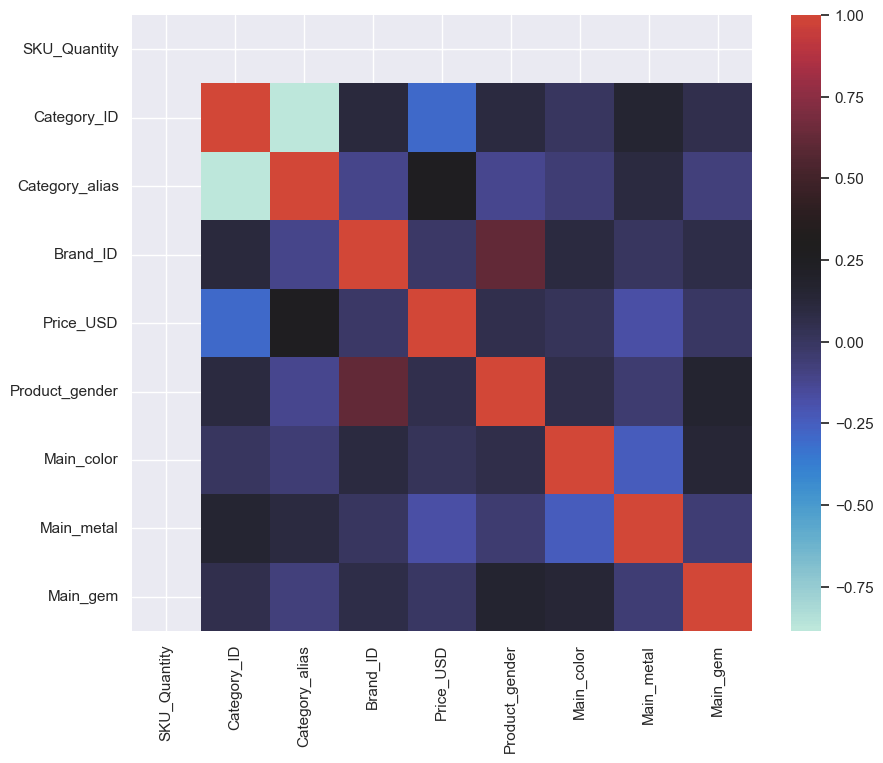

In [38]:
#Creating a heatmap
plt.figure(figsize = (10,8))

sns.heatmap(correlations, annot = True, center= .3)

plt.show(); plt.close()

In [39]:
#creating upper and lower limits for the correlation 
upper = 1
lower = .2

In [40]:
#Getting the explicit columns and their correlations 

correlated_columns = {
    column: correlations[(correlations[column] > lower) & (upper > correlations[column])].index.tolist()
    for column in correlations.columns
}

In [41]:
correlated_columns

{'SKU_Quantity': [],
 'Category_ID': [],
 'Category_alias': ['Price_USD'],
 'Brand_ID': ['Product_gender'],
 'Price_USD': ['Category_alias'],
 'Product_gender': ['Brand_ID'],
 'Main_color': [],
 'Main_metal': [],
 'Main_gem': []}

### Data Preparation 

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
data_import.columns

Index(['Order_datetime', 'Order_ID', 'Product_ID', 'SKU_Quantity',
       'Category_ID', 'Category_alias', 'Brand_ID', 'Price_USD', 'User_ID',
       'Product_gender', 'Main_color', 'Main_metal', 'Main_gem'],
      dtype='object')

In [44]:
#eliminating columns that are not needed 
column_to_eliminate = [
    'Order_datetime',
    'Order_ID',
    'SKU_Quantity',
    'Category_ID',
    'User_ID',
    'Product_ID'
]
data_import.drop(labels=column_to_eliminate, axis=1, inplace=True)

In [45]:
data_import.head()

,Category_alias,Brand_ID,Price_USD,Product_gender,Main_color,Main_metal,Main_gem
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [46]:
#filtering out unwanted categories 
data_import = data_import.loc[data_import['Category_alias'].isin(categories), :]

In [47]:
data_import.shape

(80458, 7)

In [48]:
#separate features from target
X, y = data_import.drop(labels = 'Price_USD', axis=1), data_import['Price_USD']

In [49]:
#split the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1)

In [50]:
X_train.head()

,Category_alias,Brand_ID,Product_gender,Main_color,Main_metal,Main_gem
49594,jewelry.earring,1.0,NaN,red,gold,fianit
44021,jewelry.earring,0.0,f,red,gold,pearl
32967,jewelry.earring,1.0,f,red,gold,garnet
32404,jewelry.earring,0.0,f,red,gold,fianit
39397,jewelry.earring,0.0,f,white,gold,NaN


In [51]:
y_train.head()

49594     83.42
44021    280.68
32967    184.79
32404     77.95
39397    113.56
Name: Price_USD, dtype: float64

### Data Modelling 

1. Handle missing values (This will be done using the SimpleImputer)
2. Handle the skew in the data as seen earlier (This will be done using TransformedTargetRegressor)
3. Build a pipeline for the models

In [52]:
#importing the important libraries 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline

In [53]:
#Creating a  function and pipeline that can be used to apply different regressions and complete the data Preparation 

def generate_pipeline(model, column_indices, categorical_indices, fill_missing = True, one_hot = True, label_encode = False):
    first_transformer = ColumnTransformer(
        transformers = [
            ('first', SimpleImputer(strategy = 'most_frequent'), column_indices)
        ],
        remainder = 'passthrough',
        sparse_threshold = 0.
    )

    second_transformer = ColumnTransformer(
        transformers = [
            ('second', OneHotEncoder(), categorical_indices)
        ],
        remainder = 'passthrough',
        sparse_threshold = 0.
    )

    third_transformer = ColumnTransformer(
        transformers = [
            ('third', OrdinalEncoder(), categorical_indices)
        ], 
        remainder = 'passthrough',
        sparse_threshold = 0.
    )

    steps = []

    if fill_missing: 
        steps.append(('first', first_transformer))
        
    if one_hot:
        steps.append(('second', second_transformer))

    if label_encode:
        steps.append(('third', third_transformer))

    steps.append(('model', model))

    model_pipe = Pipeline(steps = steps)

    return model_pipe

In [54]:
X.head()

,Category_alias,Brand_ID,Product_gender,Main_color,Main_metal,Main_gem
1,jewelry.pendant,1.0,f,white,gold,sapphire
2,jewelry.pendant,0.0,f,red,gold,diamond
3,jewelry.necklace,0.0,NaN,red,gold,amethyst
4,jewelry.earring,1.0,NaN,red,gold,NaN
5,jewelry.earring,0.0,NaN,red,gold,diamond


In [55]:
# Generate indices
columns = X.columns.tolist()

column_indices = [columns.index(c) for c in columns]
categorical_features = [c for c in columns if c not in ['Brand_ID']]
categorical_indices = [columns.index(c) for c in categorical_features]

In [56]:
categorical_indices

[0, 2, 3, 4, 5]

In [57]:
#Catboost initialization 

cat_pipe = generate_pipeline(
    CatBoostRegressor(loss_function = 'RMSE', iterations = 10000, one_hot_max_size=2, learning_rate=0.1),
    column_indices,
    categorical_indices,
    fill_missing = False, one_hot = False, label_encode = True
)

In [58]:
#LR initialization 

lin_pipe = generate_pipeline(
    LinearRegression(),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [59]:
# Adaboost initialization 

ada_pipe = generate_pipeline(
    AdaBoostRegressor(loss = 'exponential', n_estimators=1000, learning_rate=.01),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [60]:
# ExtraTrees initialization 

extra_pipe = generate_pipeline(
    ExtraTreesRegressor(criterion = 'friedman_mse', n_estimators = 1000, bootstrap=True),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [61]:
# Transform targets 

from sklearn.preprocessing import PowerTransformer

In [62]:
cat_pipe = TransformedTargetRegressor(regressor = cat_pipe, transformer = PowerTransformer(method = 'box-cox'))
lin_pipe = TransformedTargetRegressor(regressor = lin_pipe, transformer = PowerTransformer(method = 'box-cox'))
ada_pipe = TransformedTargetRegressor(regressor = ada_pipe, transformer = PowerTransformer(method = 'box-cox'))
extra_pipe = TransformedTargetRegressor(regressor = extra_pipe, transformer = PowerTransformer(method = 'box-cox'))

In [63]:
# fitting CatBoost 

cat_pipe.fit(X_train, y_train)

0:	learn: 0.9629049	total: 197ms	remaining: 32m 50s
1:	learn: 0.9247561	total: 208ms	remaining: 17m 19s
2:	learn: 0.8980311	total: 217ms	remaining: 12m 2s
3:	learn: 0.8705370	total: 226ms	remaining: 9m 26s
4:	learn: 0.8463798	total: 236ms	remaining: 7m 52s
5:	learn: 0.8297605	total: 245ms	remaining: 6m 48s
6:	learn: 0.8150299	total: 254ms	remaining: 6m 3s
7:	learn: 0.7999952	total: 263ms	remaining: 5m 28s
8:	learn: 0.7895694	total: 274ms	remaining: 5m 3s
9:	learn: 0.7801783	total: 282ms	remaining: 4m 42s
10:	learn: 0.7701480	total: 292ms	remaining: 4m 24s
11:	learn: 0.7622810	total: 301ms	remaining: 4m 10s
12:	learn: 0.7558878	total: 310ms	remaining: 3m 57s
13:	learn: 0.7506668	total: 320ms	remaining: 3m 47s
14:	learn: 0.7434619	total: 331ms	remaining: 3m 40s
15:	learn: 0.7382913	total: 341ms	remaining: 3m 32s
16:	learn: 0.7344354	total: 351ms	remaining: 3m 26s
17:	learn: 0.7287185	total: 360ms	remaining: 3m 19s
18:	learn: 0.7250791	total: 369ms	remaining: 3m 13s
19:	learn: 0.7204100	t

TransformedTargetRegressor(regressor=Pipeline(steps=[('third',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('third',
                                                                                       OrdinalEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      <catboost.core.CatBoostRegressor object at 0x000001E3A623CE10>)]),
                           transformer=PowerTransformer(method='box-cox'))

In [64]:
# fitting LR 

lin_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('first',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('second',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      LinearRegression())]),
                           transformer=PowerTransformer(method='box-cox'))

In [65]:
# fitting adaboost 

ada_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('first',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('second',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      AdaBoostRegressor(learning_rate=0.01,
                                                                        loss='exponential',
                                                                        n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [66]:
# fitting ExyraTrees 

extra_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('first',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('second',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

### Model Evaluation 

In [67]:
#importing metrics for evaluation 
from sklearn.metrics import r2_score, mean_squared_error

In [68]:
# initialize the RMSE
def root_mean_squared_error(y_true, y_pred):
    value = mean_squared_error(y_true, y_pred)
    return np.sqrt(value)

In [89]:
# function that generates scores from the models

def generate_scores(model, data, metric_name, metric_function):
    X, y = data
    y_ = model.predict(X)
    score = metric_function(y, y_)

    return score

In [96]:
# function that helps print the scores 

def print_metrics(metric_name, train_score, test_score):
    print(f"Train {metric_name}, {train_score}")
    print(f"Test {metric_name}, {test_score}")
    print(f"Generalization error = {train_score - test_score}")

    return

In [101]:
# function that tests the model based on the other functions 
def test_model(model, data, metric_name, metric_function):
    train, test = data

    if isinstance(metric_name, str): #single model test
        train_score = generate_scores(model, train, metric_name, metric_function)
        test_score = generate_scores(model, test, metric_name, metric_function)
        print_metrics(metric_name, train_score, test_score)

    else: # for multiple metrics
        for name, function in zip(metric_name, metric_function):
            train_score = generate_scores(model, train, name, function)
            test_score = generate_scores(model, test, name, function)
            print_metrics(name, train_score, test_score)

    return

In [74]:
# Name and function for metrics 

metric_name = ['R2', 'RMSE']
metric_function = [r2_score, root_mean_squared_error]

In [75]:
#create data variables 

data_ = [
    [X_train, y_train],
    [X_test, y_test]
]

In [107]:
test_model(cat_pipe, data_, 'R2', r2_score)

Train R2, 0.31390789141009556
Test R2, 0.3807807758285565
Generalization error = -0.06687288441846095


In [102]:
# Test CatBoost

test_model(cat_pipe, data_, metric_name, metric_function)

Train R2, 0.31390789141009556
Test R2, 0.3807807758285565
Generalization error = -0.06687288441846095
Train RMSE, 370.2766272187332
Test RMSE, 293.28170363247466
Generalization error = 76.99492358625855


In [103]:
# Test LR

test_model(lin_pipe, data_, metric_name, metric_function)

Train R2, 0.06821654522434561
Test R2, 0.1041612668663967
Generalization error = -0.03594472164205109
Train RMSE, 431.5117087038386
Test RMSE, 352.7586508276811
Generalization error = 78.75305787615753


In [104]:
# Test AdaBoost

test_model(ada_pipe, data_, metric_name, metric_function)

Train R2, 0.06988729748423417
Test R2, 0.10588435698090415
Generalization error = -0.03599705949666998
Train RMSE, 431.1246699413465
Test RMSE, 352.41923286875004
Generalization error = 78.70543707259645


In [105]:
# Test ExtraTrees

test_model(extra_pipe, data_, metric_name, metric_function)

Train R2, 0.21609795801239096
Test R2, 0.22925703037262768
Generalization error = -0.013159072360236723
Train RMSE, 395.7910642864882
Test RMSE, 327.20319891150297
Generalization error = 68.58786537498526


### Recommendations 

>From the models used, CatBoost performed the best with an approximate **R2 Score of 0.31**. A report will be made to be presented to the stakeholders of Gemineye Emporium with the following recommendations 

1. The dataset contained a lot of missing values, therefore, there should be better data integrity in the organization as a lot of the data in their present database are not really usable to create a robust model 
2. The features used for the modelling were few and a vast majority of them were categorical variables. To this end, **Gemineye Emporium** should focus on adding more features as a means of data integrity and ensuring proper integration. 
3. Based on analysis, **Gemineye Emporium** sells jewelry to more females than males and this is a segment they can explore and get more sales to the male population